# SERVO PREDICTION USING LINEAR REGRESSION

# OBJECTIVES
* **To import and analyse the data**

* **Then visualize the data using various plot**

* **Now clean and preprocess the data**

* **Then split train-teat data and perform modeling**

# DATA SOURCE
The data is downloaded from https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv

This is in the CSV format

# IMPORT LIBRARY

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [9]:
from sklearn.linear_model import LinearRegression

# IMPORT DATA

In [10]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [12]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# DESCRIBE DATA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [14]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [15]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [16]:
df.shape

(167, 5)

In [17]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [18]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


In [20]:
numerical_features = df.select_dtypes(include = [np.number]).columns

In [22]:
categorical_features = df.select_dtypes(include = [object]).columns

In [23]:
numerical_features

Index(['Pgain', 'Vgain', 'Class'], dtype='object')

In [24]:
categorical_features

Index(['Motor', 'Screw'], dtype='object')

# Data Visualization
##Heatmap Correlation

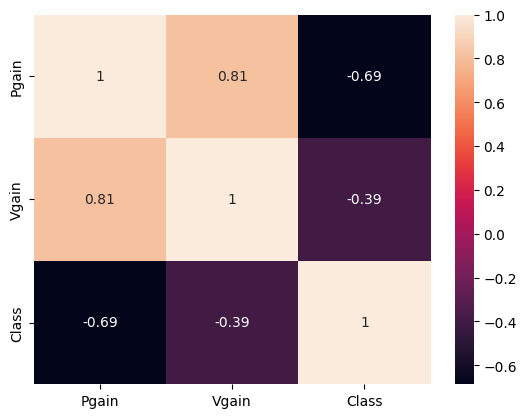

In [27]:
correlations = df.corr(numeric_only=True)
plt.figure(1)
sns.heatmap(correlations, annot=True)
plt.show()

### Univariate Analysis

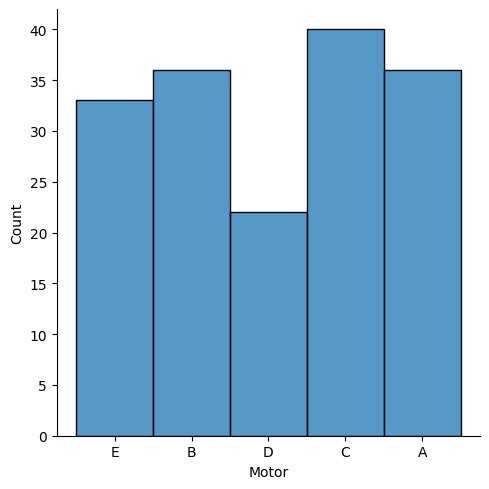

In [28]:
sns.displot(df.Motor)

<Axes: xlabel='Vgain', ylabel='Density'>

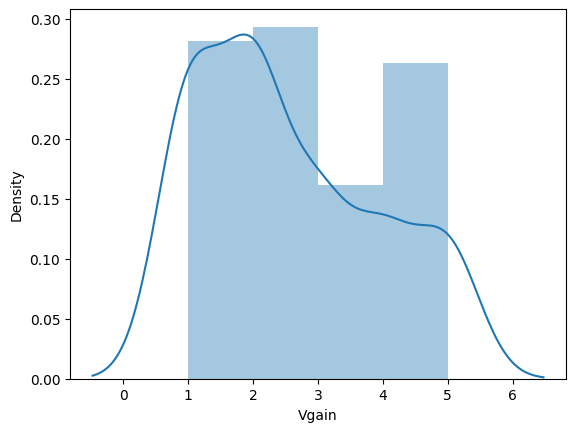

In [29]:
sns.distplot(df['Vgain'])

<Axes: ylabel='Pgain'>

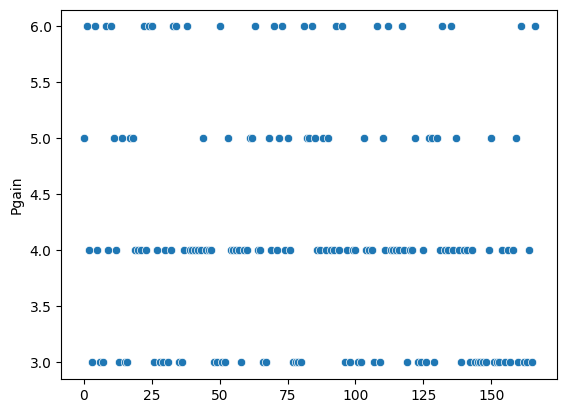

In [30]:
sns.scatterplot(df.Pgain)

###  Multivariate Analysis

In [31]:
plt.figure()

import plotly.express as px

fig = px.scatter_3d(df, x='Motor', y='Vgain', z='Screw',#hue='Pgain')

color='Pgain')

fig.show()

<Figure size 640x480 with 0 Axes>

### Histogram Analysis

array([[<Axes: title={'center': 'Pgain'}>,
        <Axes: title={'center': 'Vgain'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

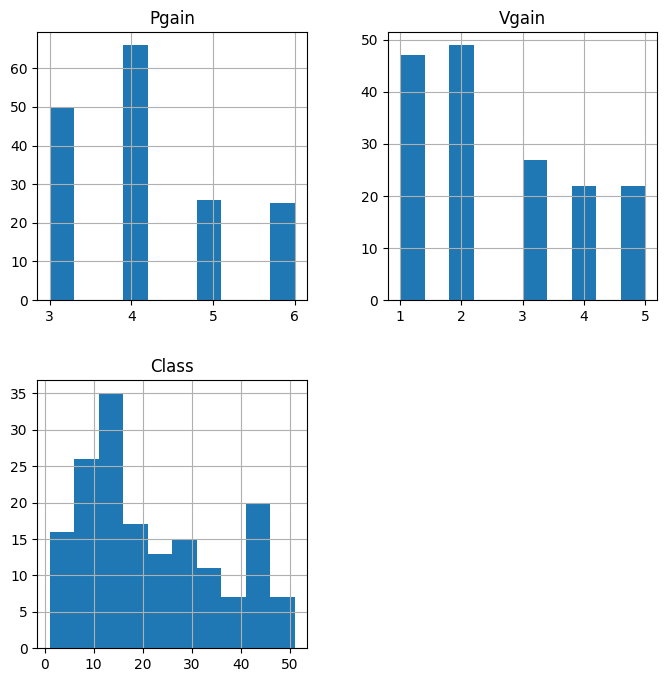

In [32]:
df.hist(figsize=(8,8))

###Pairplot Analysis

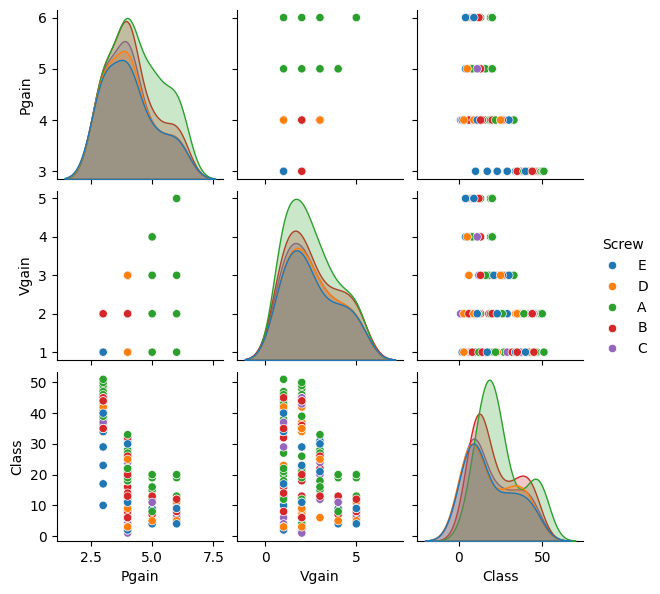

In [33]:
sns.pairplot(df,hue='Screw',size=2)

# Data Preprocessing

In [34]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

In [35]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


# Define Target Variable (y) and Feature Variables (X)

In [36]:
y = df['Class']
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

# Train Test Split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((125, 4), (42, 4), (125,), (42,))

#Modeling

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)

60.211561593192876

In [43]:
mean_absolute_error(y_test,y_pred)

6.735955685746795

In [44]:
r2_score(y_test, y_pred)

0.706476624263817

#Prediction

In [45]:
y_pred = lr.predict(x_test)

In [46]:
y_pred.shape

(42,)